In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from statsmodels.stats import diagnostic
from scipy import stats
from datetime import datetime
import time
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%reload_ext autoreload

In [3]:
#import functions
from read.read_functions import *
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

from compute_experts import *

In [4]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'


In [5]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle'
rate_beer_path = '../datas/RateBeer/pickle'

advocate_beers_path_pickle = beer_advocate_path + 'beers.csv'
advovate_breweries_path_pickle = beer_advocate_path + 'breweries.csv'
advocate_ratings_path_pickle = beer_advocate_path + 'ratings.txt'
advocate_reviews_path_pickle = beer_advocate_path + 'reviews.txt'
advocate_users_path_pickle = beer_advocate_path + 'users.csv'

matched_beer_beers_pickle = matched_beer_data_path + 'beers.csv'
matched_beer_breweries_pickle = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba_pickle = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb_pickle = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings_pickle = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx_pickle = matched_beer_data_path + 'users_approx.csv'
matched_beer_users_pickle = matched_beer_data_path + 'users.csv'

rate_beer_beers_pickle = rate_beer_path + 'beers.csv'
rate_beer_breweries_pickle = rate_beer_path + 'breweries.csv'
rate_beer_users_pickle = rate_beer_path + 'users.csv'

In [6]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users','df_rate_beer_ratings','df_rate_beer_ratings']
data_merge = ['df_all_users', 'df_ratings_stat_sampled', 'df_ratings_stat']

### Import datas stored as pickle

In [7]:
df_matched_beer_beers, df_matched_beer_breweries, df_matched_beer_ratings_ba, df_matched_beer_ratings_rb, df_matched_beer_ratings, df_matched_beer_users_approx, df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers, df_rate_beer_breweries, df_rate_beer_users, df_rate_beer_ratings, df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers, df_advocate_breweries, df_advocate_ratings, df_advocate_reviews, df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_ratings...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


In [7]:
# open merge datasets
df_all_users, df_ratings_stat_sampled, df_ratings_stat = load_datas('Results', data_merge)

Loading df_all_users...
Loading df_ratings_stat_sampled...
Loading df_ratings_stat...


In [9]:
df_all_users.head()

,ba_user_name,rb_user_name,user_id,location,joined
0,nmann08,nmann08,nmann08.184925,"United States, Washington",2008-01-07 11:00:00
1,StJamesGate,NaN,stjamesgate.163714,"United States, New York",2007-10-08 10:00:00
2,mdagnew,NaN,mdagnew.19527,Northern Ireland,2005-05-18 10:00:00
3,helloloser12345,NaN,helloloser12345.10867,Northern Ireland,2004-11-25 11:00:00
4,cypressbob,NaN,cypressbob.3708,Northern Ireland,2003-11-20 11:00:00


In [10]:
df_ratings_stat.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,ba_user_name,user_id,appearance,aroma,palate,taste,overall,rating,rb_user_name,location,joined,year
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 10:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
1,O-Ho-Ho,120824,Otley Brewing Company,13092,Extra Special / Strong Bitter (ESB),5.0,2015-11-14 11:00:00,nmann08,nmann08.184925,4.00,3.50,3.75,3.50,3.50,3.56,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
2,Ola Dubh Special Reserve 18,47581,Harviestoun Brewery Ltd.,323,Old Ale,8.0,2011-11-18 11:00:00,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,4.50,nmann08,"United States, Washington",2008-01-07 11:00:00,2011
3,Ola Dubh Special Reserve 21,93113,Harviestoun Brewery Ltd.,323,Old Ale,10.5,2013-05-03 10:00:00,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,3.75,nmann08,"United States, Washington",2008-01-07 11:00:00,2013
4,Old Engine Oil Black Ale,875,Harviestoun Brewery Ltd.,323,English Porter,6.0,2015-01-24 11:00:00,nmann08,nmann08.184925,4.00,3.50,3.75,4.00,3.75,3.81,nmann08,"United States, Washington",2008-01-07 11:00:00,2015


###  Compute is_expert dataframe

In [8]:
df_ratings_stat_expert, df_ratings_stat_pivot = compute_experts_table(df_ratings_stat)
df_ratings_stat_expert.head()

ok


,user_id,year,nb_ratings,is_expert
0,2,2000,44,False
1,2,2001,4,False
2,2,2002,1,False
3,3,2000,94,False
4,3,2001,69,False


In [9]:
df_ratings_stat_expert.groupby('year').apply(lambda x: sum(x['is_expert']))

year
1996      0
1998      1
1999      1
2000      1
2001      6
2002     16
2003     25
2004     36
2005     51
2006     68
2007     92
2008    118
2009    141
2010    166
2011    210
2012    314
2013    412
2014    660
2015    764
2016    749
2017    690
dtype: int64

## Analysis 

## 2. a)

In [16]:
avg_ratings_expert = []
avg_ratings_normal = []
ttest_expert_normal = []

interest_years = sorted([year for year in df_ratings_stat.year.unique() if year > 2002])

for year in interest_years:
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stat.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    avg_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    t_stat, p_val = stats.ttest_ind(df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'], df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'])
    ttest_expert_normal.append(t_stat)
    print(f'Ttest: Do the ratings of casual and expert are the same in {year} ? p-value = {p_val}, stat = {t_stat}')
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

Ttest: Do the ratings of casual and expert are the same in 2003 ? p-value = 3.555338170625793e-157, stat = -26.741332046705867
Ttest: Do the ratings of casual and expert are the same in 2004 ? p-value = 0.0, stat = -65.03723485748407
Ttest: Do the ratings of casual and expert are the same in 2005 ? p-value = 0.0, stat = -97.14278244806339
Ttest: Do the ratings of casual and expert are the same in 2006 ? p-value = 0.0, stat = -108.4939162445685
Ttest: Do the ratings of casual and expert are the same in 2007 ? p-value = 0.0, stat = -111.04917004040455
Ttest: Do the ratings of casual and expert are the same in 2008 ? p-value = 0.0, stat = -139.67452273606656
Ttest: Do the ratings of casual and expert are the same in 2009 ? p-value = 0.0, stat = -176.38197045250197
Ttest: Do the ratings of casual and expert are the same in 2010 ? p-value = 0.0, stat = -163.63059512592906
Ttest: Do the ratings of casual and expert are the same in 2011 ? p-value = 0.0, stat = -211.80095314019337
Ttest: Do th

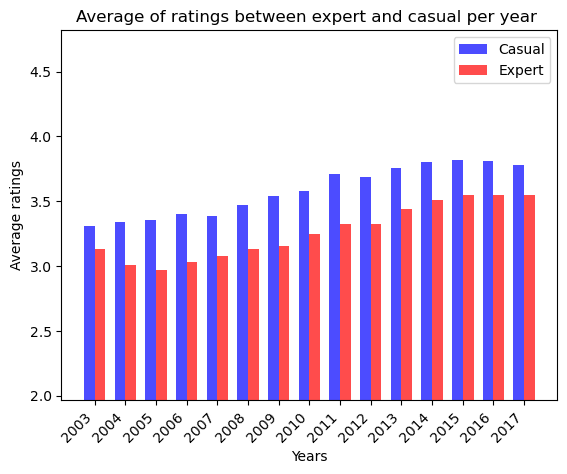

In [15]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casual', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Expert', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between expert and casual per year ')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

The plot shows that the user considered as expert tend to be more severe concerning the global rating of a beer.

## 2. g)

Try to find and analyse some beers which have been initially only been rated by expert then by casual in the next years (vice-versa) in order to identify if an expert tends to influence the ratings or not

Step 1: Find all beers which have been rated by both casual and expert

In [17]:
# Retrieve the ids of all expert user
expert_user_id = df_ratings_stat_expert[df_ratings_stat_expert.is_expert].user_id
# Separate ratings in expert and casual
df_expert_ratings = df_ratings_stat[df_ratings_stat['user_id'].isin(expert_user_id)]
df_casual_ratings = df_ratings_stat[~df_ratings_stat['user_id'].isin(expert_user_id)]

In [18]:
# Find all beer that has been rated at least once by an expert
beer_rated_by_expert = df_expert_ratings['beer_id'].unique()
# Find all beer that has been rated at least once by a casual
beer_rated_by_casual = df_casual_ratings['beer_id'].unique()

In [19]:
print(f'Total of different beer rated on the both websites : {len(df_ratings_stat.beer_id.unique())}')
print(f'expert have rated {len(beer_rated_by_expert)} different beers')
print(f'casual user have rated {len(beer_rated_by_casual)} different beers')

beer_ids_rated_by_both = list(set(beer_rated_by_casual).intersection(set(beer_rated_by_expert)))
print(f'intersection, number of beers which have been rated by casual and expert : {len(beer_ids_rated_by_both)}')

Total of different beer rated on the both websites : 447151
expert have rated 403763 different beers
casual user have rated 324774 different beers
intersection, number of beers which have been rated by casual and expert : 281386


Step 2: Find all beers which have been rated by an expert and a casual not the same year

In [21]:
# Only take beers which have been rated by both
beer_rated_by_expert_filtered = df_expert_ratings[df_expert_ratings['beer_id'].isin(beer_ids_rated_by_both)]
beer_rated_by_casual_filtered = df_casual_ratings[df_casual_ratings['beer_id'].isin(beer_ids_rated_by_both)]

In [31]:
# Select only the useful features for the task
beer_rated_by_expert_compact = beer_rated_by_expert_filtered[['beer_id', 'rating', 'year']]
beer_rated_by_casual_compact = beer_rated_by_casual_filtered[['beer_id', 'rating', 'year']]

In [40]:
# Add is_expert column to dataframe
beer_rated_by_expert_compact.loc[:, 'is_expert'] = True
beer_rated_by_casual_compact.loc[:, 'is_expert'] = False

In [66]:
# Concatenate the ratings of expert and casual
beer_rated_by_expert_casual = pd.concat([beer_rated_by_expert_compact, beer_rated_by_casual_compact])
beer_rated_by_expert_casual = beer_rated_by_expert_casual.query('year > 2002')

In [69]:
# Search for all beers which have been rated by casual and expert in a same year
# Group by 'beer_id', 'year', and 'is_expert' and count the occurrences
grouped_df = beer_rated_by_expert_casual.groupby(['beer_id', 'year', 'is_expert']).size().reset_index(name='count')

# Filter the DataFrame based on the conditions
filtered_df = grouped_df[(grouped_df['count'] > 1) & ((grouped_df['is_expert'] == True) | (grouped_df['is_expert'] == False))]

# Extract unique 'beer_id' values and convert them to a list
beer_ids_to_remove = filtered_df['beer_id'].unique().tolist()

# Display the list of 'beer_id'
print(len(beer_ids_to_remove))

238810


In [70]:
# Remove this beer
beer_rated_by_expert_casual_different_year = beer_rated_by_expert_casual_filtered[~beer_rated_by_expert_casual_filtered['beer_id'].isin(beer_ids_to_remove)]
beer_rated_by_expert_casual_different_year

,beer_id,rating,year,is_expert
91,255759,3.64,2016,True
256,96942,3.33,2013,True
299,186984,3.56,2015,True
496,149020,3.46,2015,True
518,90784,3.31,2015,True
...,...,...,...,...
6310449,462827,5.00,2017,False
6310482,456383,3.30,2017,False
6310489,277801,2.80,2014,False
6310833,86572,4.40,2008,False


In [74]:
# Group by 'beer_id' and count the unique number of years
beer_years_count = beer_rated_by_expert_casual_different_year.groupby('beer_id')['year'].nunique()

# Find the beer_id with the maximum number of unique years
most_rated_beer_id = beer_years_count.idxmax()

beer_rated_by_expert_casual_different_year[beer_rated_by_expert_casual_different_year['beer_id'] == most_rated_beer_id]

,beer_id,rating,year,is_expert
262136,9539,3.50,2014,True
882349,9539,3.25,2012,True
3681932,9539,3.23,2010,True
149798,9539,4.03,2003,False
911403,9539,3.48,2009,False
2019973,9539,3.32,2005,False
2279695,9539,3.60,2008,False
4507314,9539,3.25,2013,False
5917284,9539,3.48,2016,False
7395483,9539,3.55,2011,False


In [76]:
most_rated_beer_name = df_ratings_stat[df_ratings_stat['beer_id'] == most_rated_beer_id].iloc[0][0]
# Display the result
print(f'Beer id with the most ratings over the years by expert and casual where non of them rated it the same year: {most_rated_beer_id}')
print(f'Beer name : {most_rated_beer_name}')

Beer id with the most ratings over the years by expert and casual where non of them rated it the same year: 9539
Beer name : Pelican Pale Ale


Plot

In [88]:
df_most_rated_beer = beer_rated_by_expert_casual_different_year[beer_rated_by_expert_casual_different_year['beer_id'] == most_rated_beer_id].groupby(['year', 'is_expert'])['rating'].mean().reset_index()
df_most_rated_beer.sort_values(by='year', inplace=True)

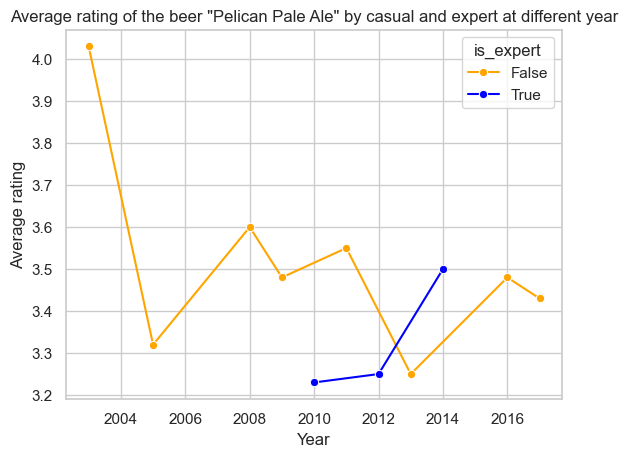

In [89]:
sns.set(style="whitegrid")
palette = {True: 'blue', False: 'orange'}
sns.lineplot(data=df_most_rated_beer, x='year', y='rating', hue='is_expert', palette=palette, marker='o')
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title(f'Average rating of the beer "{most_rated_beer_name}" by casual and expert at different year')
plt.show()

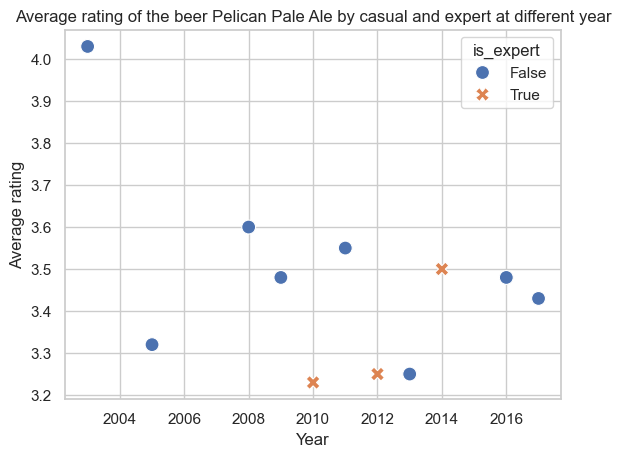

In [81]:
sns.set(style="whitegrid")
sns.scatterplot(data=df_most_rated_beer, x='year', y='rating', hue='is_expert', style='is_expert', s=100)
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title(f'Average rating of the beer {most_rated_beer_name} by casual and expert at different year')
plt.show()

the graph suggests that the rating of experts in 2012 could have influenced the ratings of casuals in 2013 as well as the rating of 2014 which could have influenced the ratings of casuals in 2016 and 2017